In [28]:
import pandas as pd
df = pd.read_csv("../src/taxipred/data/cleaned_data.csv", index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 923 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       923 non-null    float64
 1   Time_of_Day            923 non-null    object 
 2   Day_of_Week            923 non-null    object 
 3   Passenger_Count        923 non-null    float64
 4   Traffic_Conditions     923 non-null    object 
 5   Weather                923 non-null    object 
 6   Base_Fare              923 non-null    float64
 7   Per_Km_Rate            923 non-null    float64
 8   Per_Minute_Rate        923 non-null    float64
 9   Trip_Duration_Minutes  923 non-null    float64
 10  Trip_Price             923 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.5+ KB


### predict rate-columns based on time of day, day of week, weather, traffic conditions.  

In [29]:
df["controll_price"] = df["Base_Fare"] + (df["Trip_Distance_km"] * df["Per_Km_Rate"]) + (df["Trip_Duration_Minutes"] * df["Per_Minute_Rate"])

### Number of rows with price different than rates calculated as above:

In [30]:
len(df[round(df["Trip_Price"]) != round(df["controll_price"])])

192

In [31]:
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,controll_price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.320000,53.82,36.2624,36.262400
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.150000,37.27,52.9032,52.903200
3,30.33,Evening,Weekday,4.0,Low,Clear,3.48,0.51,0.150000,116.81,36.4698,36.469800
4,25.83,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.320000,22.64,15.6180,26.447700
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.480000,89.33,60.2028,60.202800
...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.490000,58.39,34.4049,34.404900
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,0.292916,61.96,62.1295,49.298562
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,0.292916,54.18,33.1236,31.656177
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.170000,114.94,61.2090,61.209000


In [32]:
df.drop(columns="controll_price", inplace=True)

In [33]:
df.columns

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')

## Highest income when traffic is Low

In [34]:
df.groupby("Traffic_Conditions")["Trip_Price"].sum() 

Traffic_Conditions
High       8695.8402
Low       21177.2959
Medium    17704.6916
Name: Trip_Price, dtype: float64

## Most logged trips during afternoon and traffic Medium or Low

In [35]:
df.groupby("Traffic_Conditions")["Time_of_Day"].value_counts().sort_values() 

Traffic_Conditions  Time_of_Day
High                Night           18
Medium              Night           34
Low                 Night           35
High                Morning         36
                    Evening         44
                    Afternoon       65
Medium              Evening         72
Low                 Evening         77
Medium              Morning         98
Low                 Morning        122
Medium              Afternoon      144
Low                 Afternoon      178
Name: count, dtype: int64

In [42]:
df.groupby(["Day_of_Week", "Time_of_Day"])["Traffic_Conditions"].value_counts()


Day_of_Week  Time_of_Day  Traffic_Conditions
Weekday      Afternoon    Low                   120
                          Medium                 98
                          High                   42
             Evening      Low                    54
                          Medium                 52
                          High                   33
             Morning      Low                    93
                          Medium                 67
                          High                   30
             Night        Low                    22
                          Medium                 22
                          High                   12
Weekend      Afternoon    Low                    58
                          Medium                 46
                          High                   23
             Evening      Low                    23
                          Medium                 20
                          High                   11
             Mornin

## Highest income on Weekday, most logged trips on weekdays afternoon

In [36]:
df.groupby("Day_of_Week")["Trip_Price"].sum()

Day_of_Week
Weekday    33249.3599
Weekend    14328.4678
Name: Trip_Price, dtype: float64

In [37]:
df.groupby("Day_of_Week")["Time_of_Day"].value_counts()


Day_of_Week  Time_of_Day
Weekday      Afternoon      260
             Morning        190
             Evening        139
             Night           56
Weekend      Afternoon      127
             Morning         66
             Evening         54
             Night           31
Name: count, dtype: int64

## Predict fares

In [41]:
df.columns

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')

In [86]:
from functions import data_handler,linear_models
import pandas as pd

df_encoded = pd.get_dummies(df, drop_first=True)
X= df_encoded[['Time_of_Day_Evening', 'Time_of_Day_Morning','Time_of_Day_Night', 'Day_of_Week_Weekend', 'Traffic_Conditions_Low','Traffic_Conditions_Medium', 'Weather_Rain', 'Weather_Snow']]
# X=df_encoded[["Trip_Distance_km","Trip_Duration_Minutes","Passenger_Count"]]
y = df_encoded[['Base_Fare', 'Per_Km_Rate','Per_Minute_Rate']]
X_train, X_test, X_val, y_train, y_test, y_val, X_train_full, y_train_full, scaled_X_train, scaled_X_test, scaled_X_val = data_handler(X,y)
df_encoded.columns


Index(['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price',
       'Time_of_Day_Evening', 'Time_of_Day_Morning', 'Time_of_Day_Night',
       'Day_of_Week_Weekend', 'Traffic_Conditions_Low',
       'Traffic_Conditions_Medium', 'Weather_Rain', 'Weather_Snow'],
      dtype='object')

In [104]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error, r2_score
from sklearn.multioutput import MultiOutputRegressor
import numpy as np

model = MultiOutputRegressor(XGBRegressor())

model.fit(X_train,y_train)
y_pred = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred, multioutput="raw_values")
mse = mean_squared_error(y_val, y_pred, multioutput="raw_values")
rmse = root_mean_squared_error(y_val, y_pred,multioutput="raw_values")
r2 = r2_score(y_val, y_pred,multioutput="raw_values")
# results.append([mae,mse,rmse])
for i in range(3): 
    metric_dict = {
        "mae": mae,
        "mse": mse,
        "rmse":rmse,
        "r2": r2,
        "abs":rmse/np.abs(y_test.mean()) 
    }
    df_metric = pd.DataFrame(metric_dict)
df_metric

,mae,mse,rmse,r2,abs
Base_Fare,0.675991,0.673832,0.820873,-0.077507,0.235864
Per_Km_Rate,0.389818,0.201831,0.449256,-0.008621,0.379998
Per_Minute_Rate,0.092510,0.012287,0.110845,0.002022,0.389967


### Improve xgbregressor

In [105]:

model = MultiOutputRegressor(XGBRegressor(
    n_estimators=1000, #antal träd som byggs D100
    learning_rate=0.02, # Hur mkt varje nytt träd påverkar slutmodellen, lägre värden = stabilare men kräver fler träd. D0.3
    max_depth=4, #större värden = risk för overfitting, mindre värden = risk för underfitting D6
    min_child_weight=2, #minsta antal observationer för att skapa en ny nod, högre värden = mer konservativ D1
    subsample=0.7, # antal rader som används per träd, < 1 ger slump och mindre overfitting. D1
    colsample_bytree=0.9, #Andel features som används per träd D1
    gamma=0, #minsta förbättring för att göra en split, högre värde = färre splits D0
    reg_alpha=4, #L1 regularisering, gör modellen glesare D0
    reg_lambda=1, #L2 regularisering, straffar stora koefficienter, stabiliserar D1
    random_state=42, 
))
model.fit(X_train,y_train)
y_pred = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred, multioutput="raw_values")
mse = mean_squared_error(y_val, y_pred, multioutput="raw_values")
rmse = root_mean_squared_error(y_val, y_pred,multioutput="raw_values")
r2 = r2_score(y_val, y_pred,multioutput="raw_values")
# results.append([mae,mse,rmse])
for i in range(3): 
    metric_dict = {
        "mae": mae,
        "mse": mse,
        "rmse":rmse,
        "r2": r2,
        "abs":rmse/np.abs(y_test.mean()) 
    }
    df_metric = pd.DataFrame(metric_dict)
df_metric

,mae,mse,rmse,r2,abs
Base_Fare,0.663348,0.632520,0.795311,-0.011445,0.228519
Per_Km_Rate,0.394917,0.200548,0.447826,-0.002209,0.378789
Per_Minute_Rate,0.093067,0.012602,0.112259,-0.023589,0.394939


In [106]:
import joblib
model.fit(X,y)
joblib.dump(model, "../src/taxipred/models/taxi_rates_XBGRegressor.joblib")

['../src/taxipred/models/taxi_rates_XBGRegressor.joblib']

In [40]:
import numpy as np
rmse/np.abs(y_test.mean())

Base_Fare          0.263370
Per_Km_Rate        0.411255
Per_Minute_Rate    0.434871
dtype: float64

<Axes: ylabel='Count'>

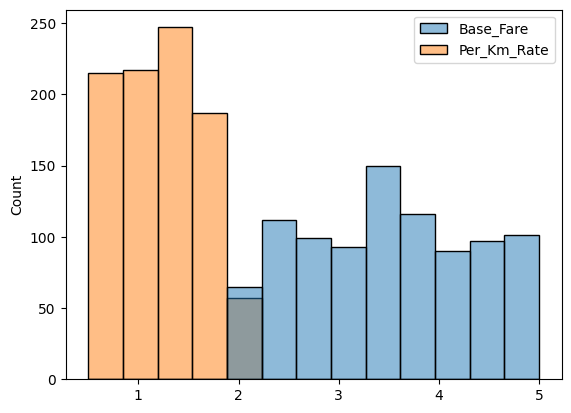

In [55]:
import seaborn as sns
sns.histplot(df[["Base_Fare","Per_Km_Rate"]])

<Axes: xlabel='Per_Minute_Rate', ylabel='Count'>

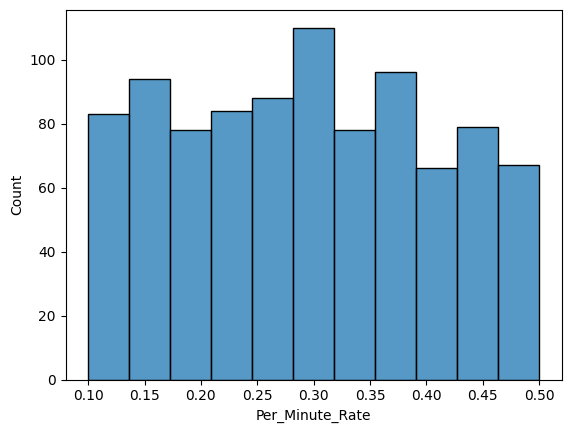

In [56]:
sns.histplot(df["Per_Minute_Rate"])


<Axes: >

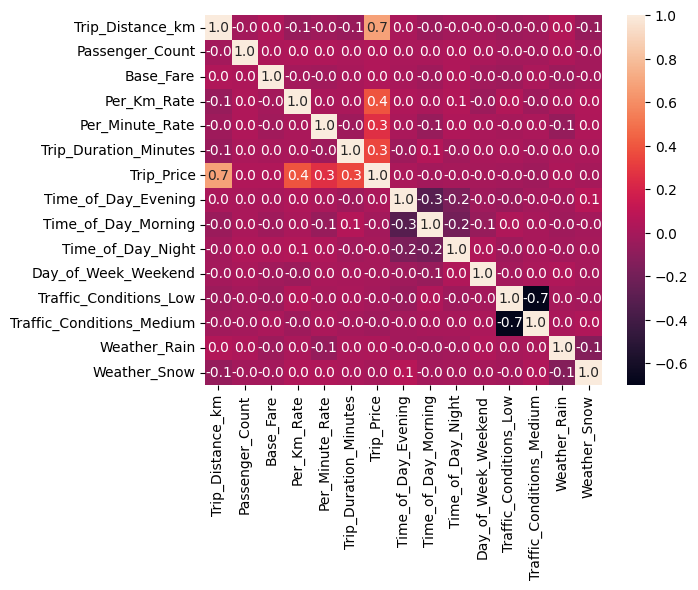

In [85]:
sns.heatmap(df_encoded.corr(), annot=True, fmt=".1f")

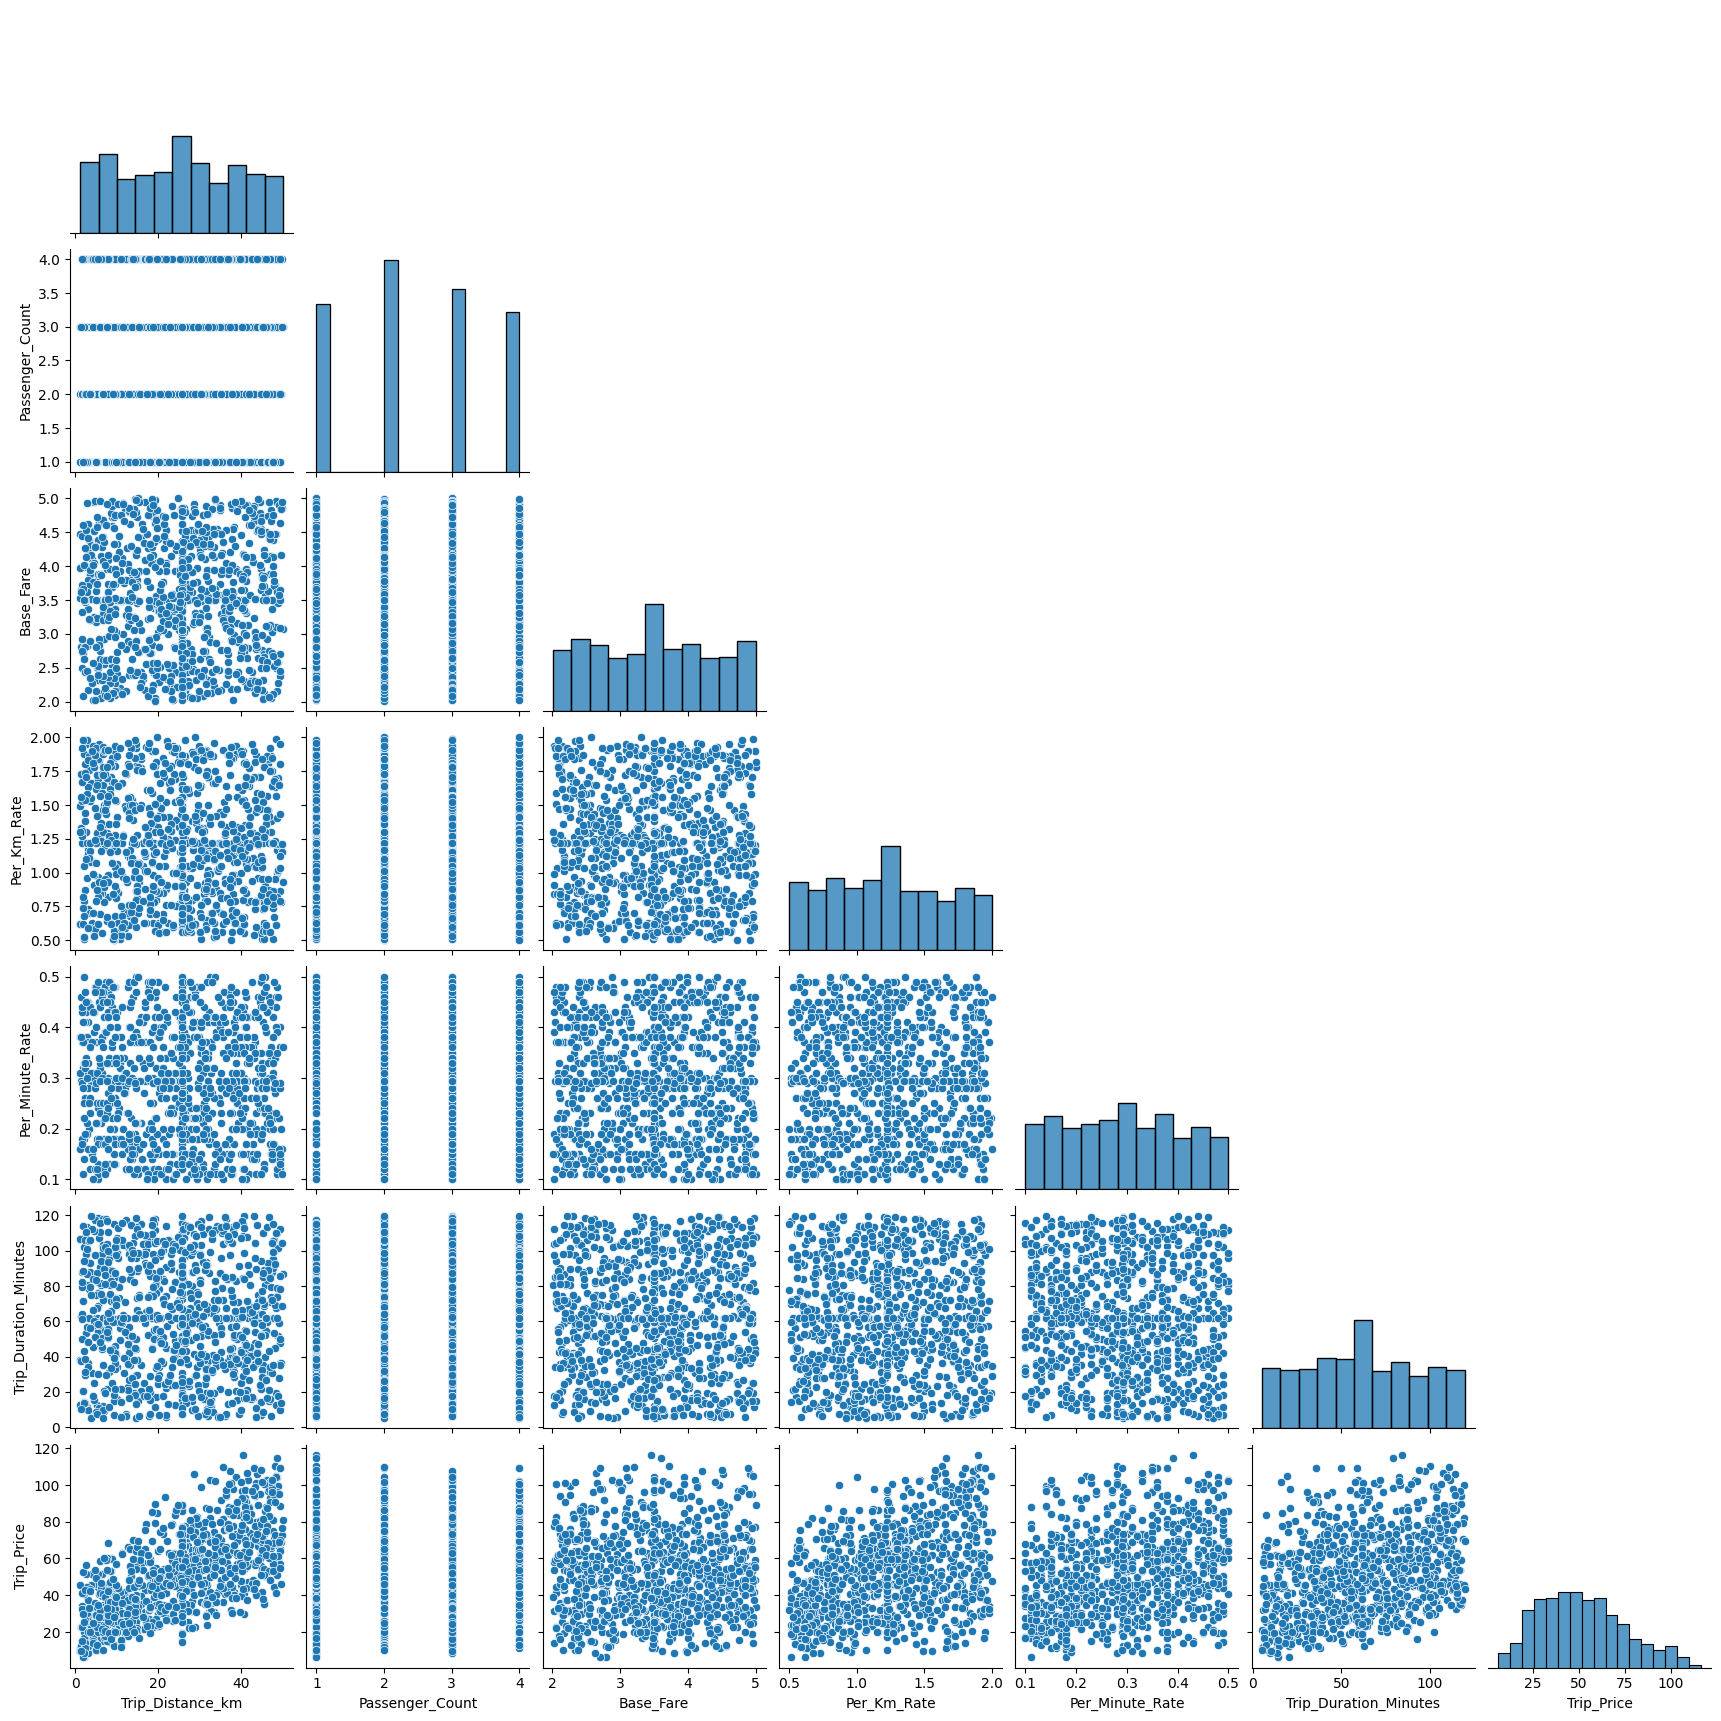

In [108]:
sns.pairplot(df,corner=True)

### Conclusion: Rates are quite constant, and no need to predict. Best is to have a set value for them
### Or just use the model for fun

In [73]:
df["Base_Fare"].value_counts().sort_values(ascending=False).head(1), df["Base_Fare"].median(),df["Base_Fare"].mean()

(Base_Fare
 3.502989    43
 Name: count, dtype: int64,
 np.float64(3.502989473684211),
 np.float64(3.492858664537834))

In [72]:
df["Per_Km_Rate"].value_counts().sort_values(ascending=False).head(1), df["Per_Km_Rate"].median(),df["Per_Km_Rate"].mean()

(Per_Km_Rate
 1.22    52
 Name: count, dtype: int64,
 np.float64(1.22),
 np.float64(1.2218201516793066))

In [71]:
df["Per_Minute_Rate"].value_counts().sort_values(ascending=False).head(1), df["Per_Minute_Rate"].median(),df["Per_Minute_Rate"].mean()

(Per_Minute_Rate
 0.292916    46
 Name: count, dtype: int64,
 np.float64(0.2929157894736842),
 np.float64(0.29353643154473397))